<a href="https://colab.research.google.com/github/ZScyan/CobraLab/blob/main/SIR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

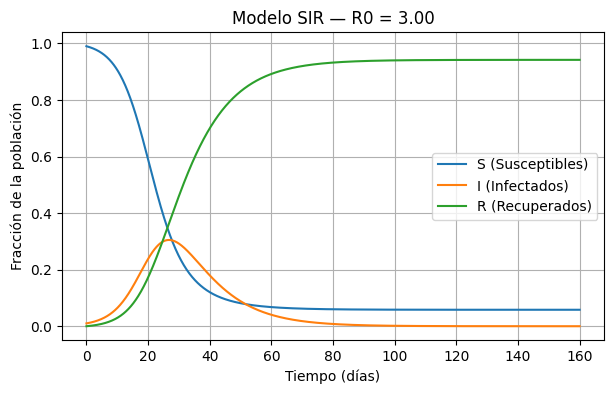

In [6]:
# Modelo SIR en Python
# -------------------------------------
# Los alumnos pueden cambiar beta y gamma y volver a ejecutar la celda
# para ver cómo cambia la curva y el valor de R0.

import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros editables ---
# β (beta): tasa de infección [1/día]
#   Depende de cuántos contactos ocurren y la probabilidad de transmisión.
#   Un rango sensato: 0.1 a 2.0 por día
beta = 0.3

# γ (gamma): tasa de recuperación [1/día]
#   Es el inverso del tiempo promedio de infección.
#   Si la infección dura 2 días → gamma ≈ 0.5
#   Si dura 7 días → gamma ≈ 0.14
#   Si dura 14 días → gamma ≈ 0.07
#   Rango razonable: 0.05 a 1.0 por día
gamma = 0.1

# Tiempo total de simulación (días) y paso de integración
dias = 160
dt = 0.1
# ----------------------------

# Condiciones iniciales (fracciones de la población total)
S0, I0, R0_init = 0.99, 0.01, 0.0

# Ecuaciones diferenciales del modelo SIR
def derivadas(S, I, R, beta, gamma):
    dS = -beta * S * I
    dI = beta * S * I - gamma * I
    dR = gamma * I
    return dS, dI, dR

# Integración numérica (método de Euler)
pasos = int(dias/dt)
S, I, R = [S0], [I0], [R0_init]

for _ in range(pasos):
    dS, dI, dR = derivadas(S[-1], I[-1], R[-1], beta, gamma)
    S.append(S[-1] + dS*dt)
    I.append(I[-1] + dI*dt)
    R.append(R[-1] + dR*dt)

t = np.linspace(0, dias, pasos+1)

# Cálculo de R0
R0_valor = beta / gamma

# Gráfica
plt.figure(figsize=(7,4))
plt.plot(t, S, label="S (Susceptibles)")
plt.plot(t, I, label="I (Infectados)")
plt.plot(t, R, label="R (Recuperados)")
plt.xlabel("Tiempo (días)")
plt.ylabel("Fracción de la población")
plt.title(f"Modelo SIR — R0 = {R0_valor:.2f}")
plt.legend()
plt.grid(True)
plt.show()
